In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd     #importando as bibliotecas
import numpy as np

In [ ]:
tabela = pd.read_excel('/content/drive/MyDrive/Faculdade/Nova pasta/basededados.xls', engine='xlrd')     #importando a tabela
display (tabela)

,Codigo EAN,Unnamed: 1,DATA,TV,Facebook,Radio,Jornal,Instagram,YouTube,Total Investido,Vendas,Cod.
0,E9AK7,1869,2022-09-08,230.1,21.8,37.8,69.2,5.8,37.8,364.7,523.25,NaN
1,E9AK8,4528,2022-09-09,44.5,17.1,39.3,45.1,24.0,39.3,170.0,272.09,NaN
2,E9AK9,6344,2022-09-10,17.2,20.9,Texto,69.3,35.1,45.9,188.4,304.59,NaN
3,E9AK10,6739,2022-09-11,151.5,14.6,41.3,58.5,7.6,41.3,273.5,409.24,NaN
4,E9AK11,432,2022-09-12,180.8,12.6,10.8,58.4,32.9,10.8,295.5,398.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
250,E9AK257,7010,2023-05-16,195.4,6.6,47.7,52.9,4.0,47.7,306.6,460.59,NaN
251,E9AK258,3881,2023-05-17,67.8,11.9,36.6,114.0,65.9,36.6,296.2,256.00,NaN
252,E9AK259,1173,2023-05-18,281.4,24.7,39.6,55.8,7.2,39.6,408.7,568.00,NaN
253,E9AK260,4127,2023-05-19,69.2,9.7,20.5,18.3,46.0,20.5,163.7,895.00,NaN


In [ ]:
tabela ['TV'] = pd.to_numeric(tabela['TV'], errors='coerce')
tabela ['Facebook'] = pd.to_numeric(tabela['Facebook'], errors='coerce')
tabela ['Radio'] = pd.to_numeric(tabela['Radio'], errors='coerce')
tabela ['Jornal'] = pd.to_numeric(tabela['Jornal'], errors='coerce')
tabela ['Instagram'] = pd.to_numeric(tabela['Instagram'], errors='coerce')
tabela ['YouTube'] = pd.to_numeric(tabela['YouTube'], errors='coerce')
tabela ['Vendas'] = pd.to_numeric(tabela['Vendas'], errors='coerce')
tabela = tabela.dropna(how='all', axis=1)
tabela = tabela.dropna(how='any', axis=0)
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 254
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Codigo EAN       223 non-null    object        
 1   Unnamed: 1       223 non-null    int64         
 2   DATA             223 non-null    datetime64[ns]
 3   TV               223 non-null    float64       
 4   Facebook         223 non-null    float64       
 5   Radio            223 non-null    float64       
 6   Jornal           223 non-null    float64       
 7   Instagram        223 non-null    float64       
 8   YouTube          223 non-null    float64       
 9   Total Investido  223 non-null    float64       
 10  Vendas           223 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 20.9+ KB
None


In [ ]:
tabela = tabela.drop('Codigo EAN', axis=1)
tabela = tabela.drop('DATA', axis=1)
tabela = tabela.drop('Total Investido', axis=1)      #limpando a tabela
tabela = tabela.drop('Unnamed: 1', axis=1)
tabela = tabela.dropna(how='all', axis=1)
tabela = tabela.dropna(how='any', axis=0)
display (tabela)

,TV,Facebook,Radio,Jornal,Instagram,YouTube,Vendas
0,230.1,21.8,37.8,69.2,5.8,37.8,523.25
1,44.5,17.1,39.3,45.1,24.0,39.3,272.09
3,151.5,14.6,41.3,58.5,7.6,41.3,409.24
4,180.8,12.6,10.8,58.4,32.9,10.8,398.19
6,57.5,9.4,32.8,23.5,36.6,32.8,250.38
...,...,...,...,...,...,...,...
250,195.4,6.6,47.7,52.9,4.0,47.7,460.59
251,67.8,11.9,36.6,114.0,65.9,36.6,256.00
252,281.4,24.7,39.6,55.8,7.2,39.6,568.00
253,69.2,9.7,20.5,18.3,46.0,20.5,895.00


In [ ]:
display(tabela.corr()) #Mostrando a correlação das vendas

,TV,Facebook,Radio,Jornal,Instagram,YouTube,Vendas
TV,1.000000,-0.105655,0.059822,0.030114,0.047190,-0.054678,0.358555
Facebook,-0.105655,1.000000,0.112952,-0.000616,-0.070702,0.383758,0.426514
Radio,0.059822,0.112952,1.000000,0.337210,-0.066241,0.198043,0.135588
Jornal,0.030114,-0.000616,0.337210,1.000000,0.072368,0.131046,0.135555
Instagram,0.047190,-0.070702,-0.066241,0.072368,1.000000,0.056034,0.117239
YouTube,-0.054678,0.383758,0.198043,0.131046,0.056034,1.000000,0.310177
Vendas,0.358555,0.426514,0.135588,0.135555,0.117239,0.310177,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

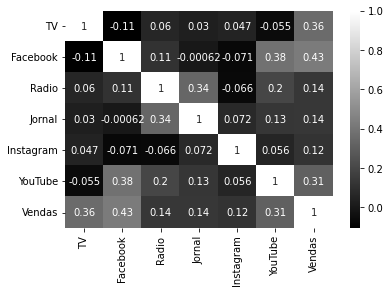

In [ ]:
sns.heatmap(tabela.corr(), annot=True, cmap='gray')    #pegando a tabela de correlação, e mostrando um grafico e mudando a cor
plt.show()

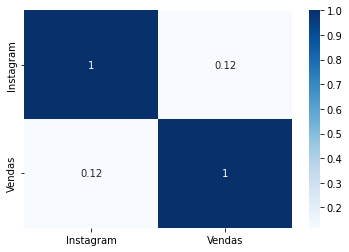

In [ ]:
sns.heatmap(tabela[['Instagram', 'Vendas']].corr(), annot=True, cmap='Blues') #mostrando somente a correlação do Instagram

In [ ]:
y = tabela['Vendas']
x = tabela.drop('Vendas', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split    #Cria testes para treino
x_treino, x_test, y_treino, y_test = train_test_split(x,y, test_size=0.25, random_state=1)   #dividindo a tabela em 4 para teste e treino, test_size vc define quantos por centos é para test e random é para vai buscar os dados apenas uma vez sem ser aleatorio

In [ ]:
from sklearn.linear_model import LinearRegression       #regressão linear, analisa como um quiz arvore de decisão se sim um lado se nao outro
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [ ]:
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)
display('Treino de Máquina Finalizado')

'Treino de Máquina Finalizado'

In [ ]:
from sklearn import metrics   #Interpreta os resultados, compara os resultados entre modelo_regressaolinear e modelo_arvoredecisao

In [ ]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

In [ ]:
print(metrics.r2_score(y_test, previsao_regressaolinear))
print(metrics.r2_score(y_test, previsao_arvoredecisao))

0.3216759070015771
0.33596887588060287


In [ ]:
previsao = pd.read_excel('/content/drive/MyDrive/Faculdade/Nova pasta/dadosprevisaocurta.xls', engine='xlrd')

print(modelo_regressaolinear.predict(previsao))

,TV,Facebook,Radio,Jornal,Instagram,YouTube
0,230.1,21.8,37.8,69.2,5.8,37.8
1,199.8,13.3,3.1,34.6,10.5,13.3
2,100.4,19.9,9.6,3.6,21.4,19.9
3,216.4,18.0,41.7,39.6,11.9,18.0
4,182.6,11.9,46.2,58.7,13.2,11.9
5,177.0,5.3,9.3,6.4,20.3,28.7
6,232.1,18.4,8.6,8.7,43.0,12.1
7,195.4,6.6,47.7,52.9,4.0,47.7


[503.70819151 417.02555822 303.31568747 455.1828105  413.37407398
 387.29191555 507.25028686 430.35444246]


In [ ]:
print(modelo_arvoredecisao.predict(previsao))

[532.1465 380.4122 237.2312 448.5169 412.2365 328.8848 457.6976 463.9414]
